<a href="https://colab.research.google.com/github/ANKITPODDER2000/CNN_TF/blob/master/MonkeyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu==2.2.0

In [ ]:
import tensorflow as tf
import os
import zipfile

In [ ]:
print("Version of tensorflow is : ",tf.__version__)

Version of tensorflow is :  2.2.0


In [ ]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [ ]:
os.chdir("/content/drive/My Drive/CNN/monkey detection/")

In [ ]:
print("Current path is : ",os.getcwd())

Current path is :  /content/drive/My Drive/CNN/monkey detection


In [ ]:
fl = zipfile.ZipFile('./data.zip',"r")

In [ ]:
fl.extractall("./data")

In [ ]:
train_dir = "./data/training/training/"
test_dir  = "./data/validation/validation/"

In [ ]:
print("No of files in '%s' folder is : %d"%(train_dir,len(os.listdir(train_dir))))
print("No of files in '%s' folder is : %d"%(test_dir,len(os.listdir(test_dir))))

No of files in './data/training/training/' folder is : 10
No of files in './data/validation/validation/' folder is : 10


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255.0))
test_datagen  = ImageDataGenerator(rescale= (1.0 / 255.0))

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(256,256),class_mode='categorical',batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,target_size=(256,256),class_mode='categorical',batch_size=32)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
print("Total no of image for training : ",train_data.n)
print("Total no of image for testing or validation : ",test_data.n)

Total no of image for training :  1098
Total no of image for testing or validation :  272


In [ ]:
print("Classes := ",train_data.class_indices)

Classes :=  {'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}


In [ ]:
class_name = list(train_data.class_indices.keys())
class_name

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [ ]:
#plt.imshow(train_data[0][0][10])
#plt.title(train_data[0][1][10])
train_data[0][1][10].shape

(10,)

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model1.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [ ]:
history1 = model1.fit(train_data,
                      epochs=20,
                      steps_per_epoch=train_data.n//train_data.batch_size ,
                      validation_data=test_data,
                      validation_steps=test_data.n//test_data.batch_size
)

Epoch 1/20
34/34 [==============================] - 34s 990ms/step - loss: 2.1628 - acc: 0.2167 - val_loss: 1.8302 - val_acc: 0.3438
Epoch 2/20
34/34 [==============================] - 34s 996ms/step - loss: 1.4581 - acc: 0.4953 - val_loss: 1.4825 - val_acc: 0.4805
Epoch 3/20
34/34 [==============================] - 33s 983ms/step - loss: 0.9633 - acc: 0.6756 - val_loss: 1.2452 - val_acc: 0.5703
Epoch 4/20
34/34 [==============================] - 32s 952ms/step - loss: 0.6352 - acc: 0.7927 - val_loss: 1.0848 - val_acc: 0.6016
Epoch 5/20
34/34 [==============================] - 33s 982ms/step - loss: 0.4561 - acc: 0.8565 - val_loss: 1.3554 - val_acc: 0.5898
Epoch 6/20
34/34 [==============================] - 34s 987ms/step - loss: 0.1861 - acc: 0.9465 - val_loss: 1.5171 - val_acc: 0.6445
Epoch 7/20
34/34 [==============================] - 33s 977ms/step - loss: 0.0468 - acc: 0.9887 - val_loss: 1.6519 - val_acc: 0.6250
Epoch 8/20
34/34 [==============================] - 33s 982ms/step - 

In [ ]:
def plotHistory(history):
  fig,ax = plt.subplots(1,2,figsize=(16,6))
  ax[0].plot(history['acc'],label="accurecy")
  ax[0].plot(history['val_acc'],label="validation accurecy")
  ax[0].set_title("Accurecy")
  ax[0].grid(True)
  ax[1].plot(history['loss'],label="Loss")
  ax[1].plot(history['val_loss'],label="validation Loss")
  ax[1].set_title("Loss")
  ax[1].grid()

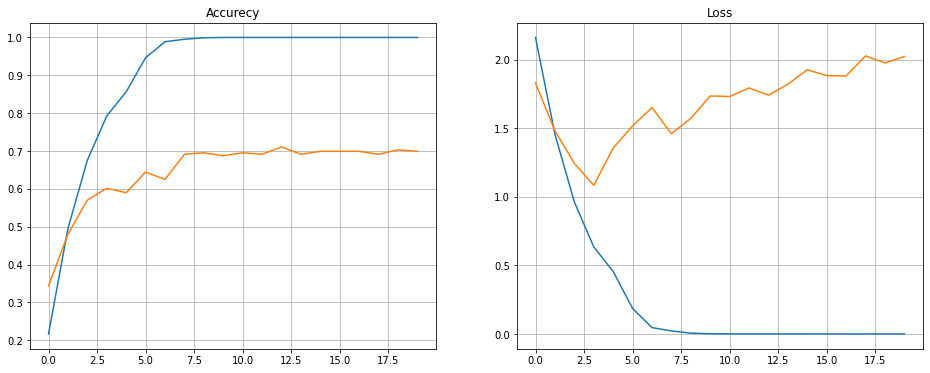

In [ ]:
plotHistory(history1.history)

In [ ]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255.0),
                                   rotation_range=25,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   zoom_range=0.4,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
test_datagen  = ImageDataGenerator(rescale= (1.0 / 255.0))

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(256,256),class_mode='categorical',batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,target_size=(256,256),class_mode='categorical',batch_size=32)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


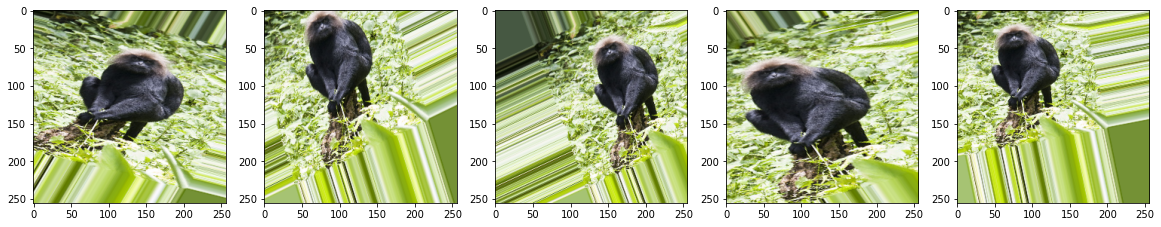

In [ ]:
_,ax = plt.subplots(1,5,figsize=(20,4))
for i in range(5):
  ax[i].imshow(train_data[0][0][10])

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model2.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])
history1 = model2.fit(train_data,
                      epochs=15,
                      steps_per_epoch=train_data.n//train_data.batch_size ,
                      validation_data=test_data,
                      validation_steps=test_data.n//test_data.batch_size
)

Epoch 1/15
34/34 [==============================] - 51s 1s/step - loss: 2.3073 - acc: 0.1250 - val_loss: 2.2288 - val_acc: 0.1289
Epoch 2/15
34/34 [==============================] - 51s 2s/step - loss: 2.1775 - acc: 0.1961 - val_loss: 2.0802 - val_acc: 0.2305
Epoch 3/15
34/34 [==============================] - 50s 1s/step - loss: 1.9428 - acc: 0.2805 - val_loss: 1.8531 - val_acc: 0.3516
Epoch 4/15
34/34 [==============================] - 51s 1s/step - loss: 1.7420 - acc: 0.3649 - val_loss: 1.8363 - val_acc: 0.3594
Epoch 5/15
34/34 [==============================] - 50s 1s/step - loss: 1.5922 - acc: 0.3959 - val_loss: 1.6651 - val_acc: 0.3750
Epoch 6/15
34/34 [==============================] - 50s 1s/step - loss: 1.5708 - acc: 0.4034 - val_loss: 1.4627 - val_acc: 0.4805
Epoch 7/15
34/34 [==============================] - 50s 1s/step - loss: 1.5330 - acc: 0.4475 - val_loss: 1.5728 - val_acc: 0.4141
Epoch 8/15
34/34 [==============================] - 51s 1s/step - loss: 1.4832 - acc: 0.44

In [ ]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255.0),
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.25,
                                   shear_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
test_datagen  = ImageDataGenerator(rescale= (1.0 / 255.0))

train_data = train_datagen.flow_from_directory(train_dir,target_size=(256,256),class_mode='categorical',batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,target_size=(256,256),class_mode='categorical',batch_size=32)

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model3.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])
history3 = model3.fit(train_data,
                      epochs=25,
                      steps_per_epoch=train_data.n//train_data.batch_size ,
                      validation_data=test_data,
                      validation_steps=test_data.n//test_data.batch_size
)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/25
34/34 [==============================] - 49s 1s/step - loss: 2.2142 - acc: 0.1875 - val_loss: 1.8309 - val_acc: 0.2891
Epoch 2/25
34/34 [==============================] - 49s 1s/step - loss: 1.6031 - acc: 0.4325 - val_loss: 1.3618 - val_acc: 0.5312
Epoch 3/25
34/34 [==============================] - 49s 1s/step - loss: 1.3412 - acc: 0.5075 - val_loss: 1.3505 - val_acc: 0.5000
Epoch 4/25
34/34 [==============================] - 49s 1s/step - loss: 1.2196 - acc: 0.5807 - val_loss: 1.2422 - val_acc: 0.5742
Epoch 5/25
34/34 [==============================] - 49s 1s/step - loss: 1.0925 - acc: 0.6144 - val_loss: 1.1500 - val_acc: 0.6094
Epoch 6/25
34/34 [==============================] - 49s 1s/step - loss: 0.9846 - acc: 0.6332 - val_loss: 1.2377 - val_acc: 0.5664
Epoch 7/25
34/34 [==============================] - 49s 1s/step - loss: 0.9626 - acc: 0.6426 - val_loss: 1.0277 - val_acc: 0.6211
Epoch

In [ ]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255.0),
                                   zoom_range=0.20,
                                   fill_mode="nearest")
test_datagen  = ImageDataGenerator(rescale= (1.0 / 255.0))

train_data = train_datagen.flow_from_directory(train_dir,target_size=(256,256),class_mode='categorical',batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,target_size=(256,256),class_mode='categorical',batch_size=32)

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model3.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])
history3 = model3.fit(train_data,
                      epochs=25,
                      steps_per_epoch=train_data.n//train_data.batch_size ,
                      validation_data=test_data,
                      validation_steps=test_data.n//test_data.batch_size
)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/25
34/34 [==============================] - 49s 1s/step - loss: 2.2564 - acc: 0.1886 - val_loss: 2.0048 - val_acc: 0.3125
Epoch 2/25
34/34 [==============================] - 48s 1s/step - loss: 1.7885 - acc: 0.3968 - val_loss: 1.6713 - val_acc: 0.4570
Epoch 3/25
34/34 [==============================] - 48s 1s/step - loss: 1.4297 - acc: 0.5000 - val_loss: 1.4279 - val_acc: 0.5078
Epoch 4/25
34/34 [==============================] - 48s 1s/step - loss: 1.1439 - acc: 0.5957 - val_loss: 1.3320 - val_acc: 0.5391
Epoch 5/25
34/34 [==============================] - 49s 1s/step - loss: 0.9834 - acc: 0.6567 - val_loss: 1.2002 - val_acc: 0.6211
Epoch 6/25
34/34 [==============================] - 48s 1s/step - loss: 0.8089 - acc: 0.7336 - val_loss: 1.1849 - val_acc: 0.5938
Epoch 7/25
34/34 [==============================] - 48s 1s/step - loss: 0.7106 - acc: 0.7505 - val_loss: 1.2476 - val_acc: 0.6211
Epoch

In [ ]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255.0),
                                   zoom_range=0.30,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
test_datagen  = ImageDataGenerator(rescale= (1.0 / 255.0))

train_data = train_datagen.flow_from_directory(train_dir,target_size=(256,256),class_mode='categorical',batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,target_size=(256,256),class_mode='categorical',batch_size=32)

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model4.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])
history4 = model4.fit(train_data,
                      epochs=25,
                      steps_per_epoch=train_data.n//train_data.batch_size ,
                      validation_data=test_data,
                      validation_steps=test_data.n//test_data.batch_size
)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/25
34/34 [==============================] - 48s 1s/step - loss: 2.2929 - acc: 0.1360 - val_loss: 2.0526 - val_acc: 0.3047
Epoch 2/25
34/34 [==============================] - 48s 1s/step - loss: 1.7917 - acc: 0.3433 - val_loss: 1.6972 - val_acc: 0.3516
Epoch 3/25
34/34 [==============================] - 49s 1s/step - loss: 1.4383 - acc: 0.4934 - val_loss: 1.3677 - val_acc: 0.5352
Epoch 4/25
34/34 [==============================] - 49s 1s/step - loss: 1.2536 - acc: 0.5403 - val_loss: 1.3551 - val_acc: 0.5117
Epoch 5/25
34/34 [==============================] - 48s 1s/step - loss: 1.1354 - acc: 0.6182 - val_loss: 1.2340 - val_acc: 0.5977
Epoch 6/25
34/34 [==============================] - 48s 1s/step - loss: 1.0209 - acc: 0.6407 - val_loss: 1.1755 - val_acc: 0.5898
Epoch 7/25
34/34 [==============================] - 49s 1s/step - loss: 0.8974 - acc: 0.6932 - val_loss: 1.3572 - val_acc: 0.5938
Epoch